In [1]:
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras.layers import Activation, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from utils.gpu_memory import limited_gpu_memory

In [2]:
limited_gpu_memory()

memory growth: True


In [3]:
(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

In [4]:
print(train_data.shape)
print(train_labels.shape)

print(test_data.shape)
print(test_labels.shape)

(404, 13)
(404,)
(102, 13)
(102,)


In [5]:
# データセットのデータの確認
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE',  'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
df = pd.DataFrame(train_data, columns=column_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65


In [6]:
# データセットのラベルの確認
print(train_labels[0:10])

[15.2 42.3 50.  21.1 17.7 18.5 11.3 15.6 15.6 14.4]


In [7]:
# データセットの前処理
order = np.argsort(np.random.random(train_labels.shape))
train_data = train_data[order]
train_labels = train_labels[order]

mean = train_data.mean(axis=0)
std = train_data.std(axis=0)
train_data = (train_data - mean) / std
test_data = (test_data - mean) / std

In [8]:
# データセットの前処理後のデータ確認
df = pd.DataFrame(train_data, columns=column_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.397253,1.412057,-1.126646,-0.256833,-1.027385,0.726354,-1.000164,0.023834,-0.511142,-0.047533,-1.490674,0.415841,-0.836487
1,0.087846,-0.483615,1.028326,-0.256833,1.371293,-3.817250,0.676891,-1.049006,1.675886,1.565287,0.784476,-0.000885,-0.775760
2,-0.395379,1.201427,-0.690066,-0.256833,-0.942023,0.827918,-0.939245,0.259915,-0.626249,-0.914123,-0.398602,0.448077,-1.347144
3,-0.403759,3.097099,-1.022279,-0.256833,-1.095675,0.351129,-1.480347,2.364762,-0.626249,-0.330379,-0.262093,0.400521,-0.880652
4,-0.348692,-0.483615,-0.720935,-0.256833,-0.455458,3.467186,0.501302,-0.417158,-0.165822,-0.595170,-0.489608,0.289557,-1.119419


In [9]:
# モデルの作成
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(13,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

In [10]:
model.compile(loss='mse', optimizer=Adam(lr=0.001), metrics=['mae'])

In [11]:
early_stop = EarlyStopping(monitor='val_loss', patience=30)

In [12]:
history = model.fit(train_data, train_labels, epochs=500, validation_split=0.2, callbacks=[early_stop])

3 [==============================] - 0s 176us/sample - loss: 5.1584 - mae: 1.6779 - val_loss: 14.3863 - val_mae: 2.5716
Epoch 137/500
323/323 [==============================] - 0s 180us/sample - loss: 5.0857 - mae: 1.6740 - val_loss: 14.5050 - val_mae: 2.5919
Epoch 138/500
323/323 [==============================] - 0s 192us/sample - loss: 5.0440 - mae: 1.6607 - val_loss: 14.3447 - val_mae: 2.5787
Epoch 139/500
323/323 [==============================] - 0s 176us/sample - loss: 5.0081 - mae: 1.6513 - val_loss: 14.3205 - val_mae: 2.5699
Epoch 140/500
323/323 [==============================] - 0s 176us/sample - loss: 4.9933 - mae: 1.6433 - val_loss: 14.4796 - val_mae: 2.5788
Epoch 141/500
323/323 [==============================] - 0s 176us/sample - loss: 5.1118 - mae: 1.6655 - val_loss: 14.4278 - val_mae: 2.5754
Epoch 142/500
323/323 [==============================] - 0s 180us/sample - loss: 4.9864 - mae: 1.6740 - val_loss: 14.4527 - val_mae: 2.5791
Epoch 143/500
323/323 [=================

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


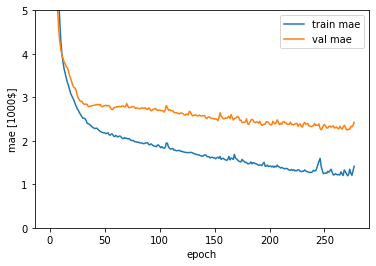

In [13]:
print(history.history.keys())
plt.plot(history.history['mae'], label='train mae')
plt.plot(history.history['val_mae'], label='val mae')
plt.xlabel('epoch')
plt.ylabel('mae [1000$]')
plt.legend(loc='best')
plt.ylim([0, 5])
plt.show()

In [14]:
# 評価
test_loss, test_mae = model.evaluate(test_data, test_labels)
print('loss:{:.3f} mae: {:.3f}'.format(test_loss, test_mae))

102/102 [==============================] - 0s 235us/sample - loss: 15.7857 - mae: 2.4847
loss:15.786 mae: 2.485


In [15]:
# 推論
print(np.round(test_labels[0:10]))

test_predictions = model.predict(test_data[0:10]).flatten()
print(np.round(test_predictions))

[ 7. 19. 19. 27. 22. 24. 31. 23. 20. 23.]
[ 8. 19. 22. 34. 26. 24. 25. 21. 20. 22.]
